In [1]:
#from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, loadMCSamples, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
from matplotlib import rc
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.special import gamma, factorial, erfinv
import matplotlib.pyplot as plt
import os,sys

In [2]:
def get_model(root):
    model=pd.read_csv(root, sep='\s+',skiprows=9)
    model=pd.read_csv(root, sep='\s+',header=None, 
                      skiprows=10, names=model.keys()[1:len(model.keys())])
    
    return model

In [3]:
u1=get_model('./theory/u100_cl_lensed.dat')
u2=get_model('./theory/u200_cl_lensed.dat')
u3=get_model('./theory/u300_cl_lensed.dat')
u4=get_model('./theory/u400_cl_lensed.dat')
u5=get_model('./theory/u500_cl_lensed.dat')
u6=get_model('./theory/u600_cl_lensed.dat')
u7=get_model('./theory/u700_cl_lensed.dat')
u8=get_model('./theory/u800_cl_lensed.dat')
u9=get_model('./theory/u900_cl_lensed.dat')
lcdm=get_model('./theory/lcdm00_cl_lensed.dat')

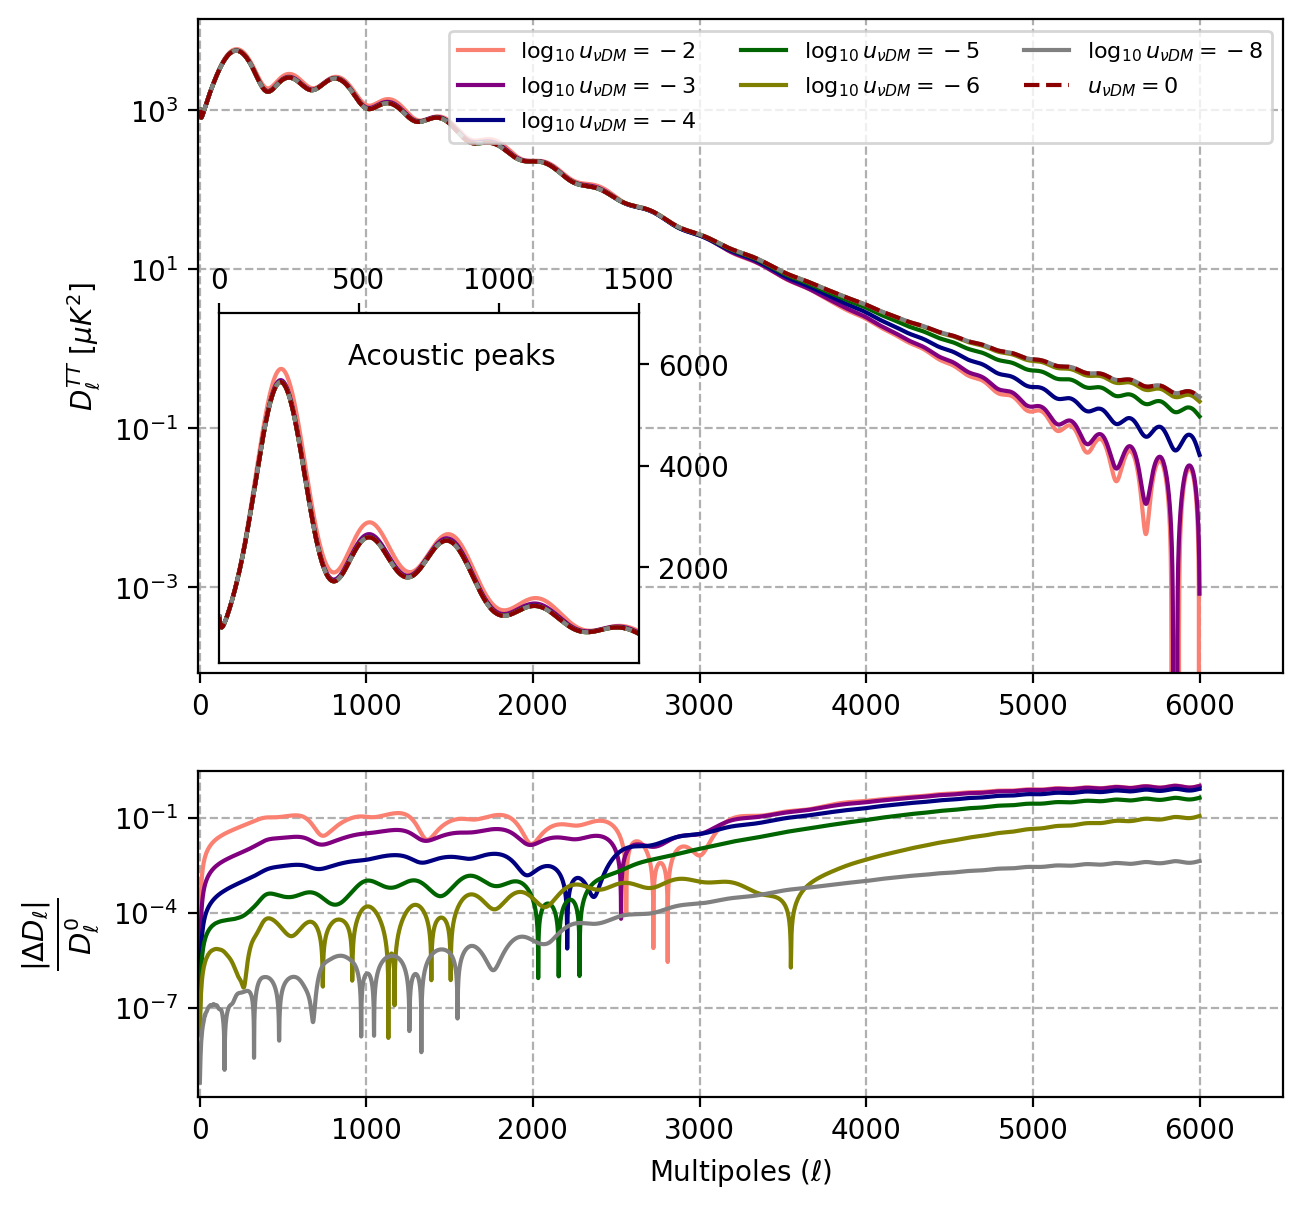

In [6]:
fig, ax = plt.subplots(2,1, figsize = (8,8), gridspec_kw={'height_ratios': [1.5, 0.75]})

ax[0].set_xscale("linear")
ax[0].set_yscale("log")

ax[0].set_ylabel(r'$D_{\ell}^{TT}$ [$\mu K^2$]')
ax[1].set_ylabel(r'$ \frac{|\Delta D_{\ell}|}{D_{\ell}^{0}}$',size=15)
ax[1].set_xlabel(r'Multipoles ($\ell$)')

ax[0].plot(u2['1:l'],u2['2:TT'], c='salmon',label=r'$\log_{10} u_{νDM} = -2$')
ax[0].plot(u3['1:l'],u3['2:TT'], c='purple',label=r'$\log_{10} u_{νDM} = -3$')
ax[0].plot(u4['1:l'],u4['2:TT'], c='navy',label=r'$\log_{10} u_{νDM} = -4$')
ax[0].plot(u5['1:l'],u5['2:TT'], c='DarkGreen',label=r'$\log_{10} u_{νDM} = -5$')
ax[0].plot(u6['1:l'],u6['2:TT'], c='Olive',label=r'$\log_{10} u_{νDM} = -6$')
ax[0].plot(u8['1:l'],u8['2:TT'], c='grey',label=r'$\log_{10} u_{νDM} = -8$')

ax[0].plot(lcdm['1:l'],lcdm['2:TT'], color='Darkred', ls='--', label=r"$u_{νDM} = 0$")

ax[1].plot(u2['1:l'],np.abs(lcdm['2:TT']-u2['2:TT'])/lcdm['2:TT'], c='salmon',label=r'$\log_{10} u_{νDM} = -2$')
ax[1].plot(u3['1:l'],np.abs(lcdm['2:TT']-u3['2:TT'])/lcdm['2:TT'], c='purple',label=r'$\log_{10} u_{νDM} = -3$')
ax[1].plot(u4['1:l'],np.abs(lcdm['2:TT']-u4['2:TT'])/lcdm['2:TT'], c='navy',label=r'$\log_{10} u_{νDM} = -4$')
ax[1].plot(u5['1:l'],np.abs(lcdm['2:TT']-u5['2:TT'])/lcdm['2:TT'], c='DarkGreen',label=r'$\log_{10} u_{νDM} = -5$')
ax[1].plot(u6['1:l'],np.abs(lcdm['2:TT']-u6['2:TT'])/lcdm['2:TT'], c='Olive',label=r'$\log_{10} u_{νDM} = -6$')
ax[1].plot(u8['1:l'],np.abs(lcdm['2:TT']-u8['2:TT'])/lcdm['2:TT'], c='grey',label=r'$\log_{10} u_{νDM} = -8$')

ax[1].set_xscale("linear")
ax[1].set_yscale("log")


# location for the zoomed portion 
sub_axes = plt.axes([.14, .42, .3, .25]) 
sub_axes.set_yscale('linear')
sub_axes.set_xscale('linear')
sub_axes.figure.set_size_inches(7, 7)
sub_axes.yaxis.tick_right()
sub_axes.xaxis.tick_top()
sub_axes.text(x=460,y=6000, s=r"Acoustic peaks")
sub_axes.set_xlim(0,1500)
sub_axes.set_ylim(100,7000)

# plot the zoomed portion
sub_axes.plot(u2['1:l'],u2['2:TT'], c='salmon',label=r'$\log_{10} u_{νDM} = -2$')
sub_axes.plot(u3['1:l'],u3['2:TT'], c='purple',label=r'$\log_{10} u_{νDM} = -3$')
sub_axes.plot(u4['1:l'],u4['2:TT'], c='navy',label=r'$\log_{10} u_{νDM} = -4$')
sub_axes.plot(u5['1:l'],u5['2:TT'], c='DarkGreen',label=r'$\log_{10} u_{νDM} = -5$')
sub_axes.plot(u6['1:l'],u6['2:TT'], c='Olive',label=r'$\log_{10} u_{νDM} = -6$')
sub_axes.plot(u8['1:l'],u8['2:TT'], c='grey',label=r'$\log_{10} u_{νDM} = -8$')
sub_axes.plot(lcdm['1:l'],lcdm['2:TT'], color='Darkred', ls='--', label=r"$u_{νDM} = 0$")


ax[1].set_xlim(-10,6500)
ax[0].set_xlim(-10,6500)
ax[0].grid(lw=0.8,ls='--')
ax[1].grid(lw=0.8,ls='--')


ax[0].legend(loc='upper right', ncol=3, fontsize=8)

plt.savefig('Theory.pdf')